In [20]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import pandas_profiling

/home/harish/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
data = pd.read_csv('./loan.csv', low_memory=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [4]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.replace('n/a', np.nan, inplace=True)
data.emp_length.fillna(value=0, inplace=True)

In [6]:
data['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
data['emp_length'] = data['emp_length'].astype(int)

In [7]:
data['term'] = data['term'].apply(lambda x: x.lstrip())

In [8]:
data.issue_d.fillna(value=np.nan, inplace=True)
data.issue_d = pd.to_datetime(data.issue_d)

In [9]:
data.earliest_cr_line = pd.to_datetime(data.earliest_cr_line)
data['earliest_cr_line_year'] = data['earliest_cr_line'].dt.year

In [10]:
data['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
data['emp_length'] = data['emp_length'].astype(int)

In [11]:
missing_info = data.apply(lambda x: (100.0*sum(x.isnull()))/x.shape[0], axis=0)
missing_info[missing_info > 50]

desc                           85.797726
mths_since_last_delinq         51.197065
mths_since_last_record         84.555303
mths_since_last_major_derog    75.015974
annual_inc_joint               99.942415
dti_joint                      99.942640
verification_status_joint      99.942415
open_acc_6m                    97.591559
open_il_6m                     97.591559
open_il_12m                    97.591559
open_il_24m                    97.591559
mths_since_rcnt_il             97.654892
total_bal_il                   97.591559
il_util                        97.902024
open_rv_12m                    97.591559
open_rv_24m                    97.591559
max_bal_bc                     97.591559
all_util                       97.591559
inq_fi                         97.591559
total_cu_tl                    97.591559
inq_last_12m                   97.591559
dtype: float64

In [12]:
data = data.drop(missing_info[missing_info > 50].index, 1)

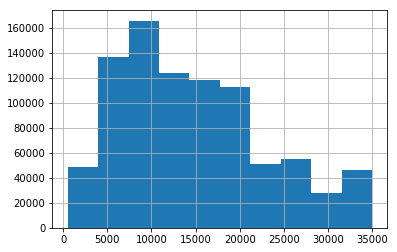

In [13]:
data['funded_amnt'].hist(bins=10)

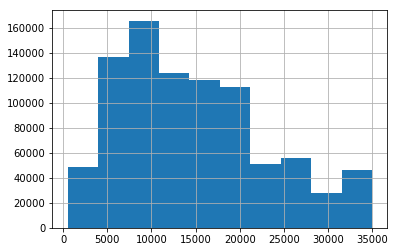

In [14]:
data['loan_amnt'].hist(bins=10)

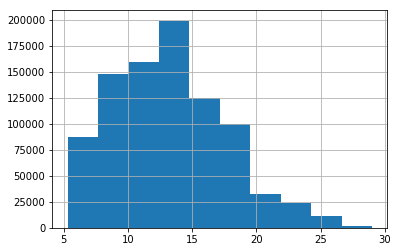

In [15]:
data['int_rate'].hist(bins=10)

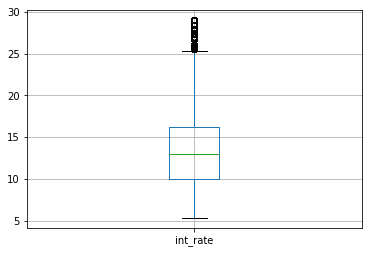

In [16]:
data.boxplot(column='int_rate')

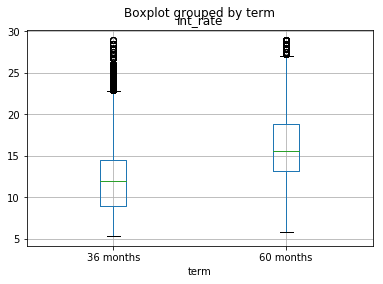

In [17]:
data.boxplot(column='int_rate', by = 'term')

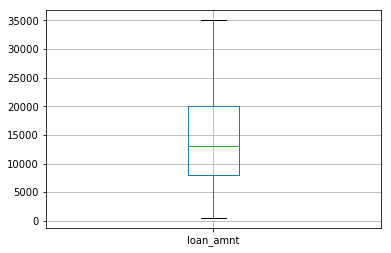

In [18]:
data.boxplot(column='loan_amnt')

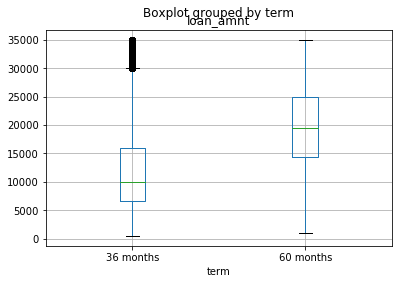

In [19]:
data.boxplot(column='loan_amnt', by='term')